## Import Libraries

In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

## Problem Statement

- Predict the price of a car based on its specifications (e.g., engine size, curb weight, horsepower, and fuel type). 
- This would involve cleaning the price column and handling any missing values.

## Data Gathering

In [2]:
df = pd.read_csv("autos_dataset.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [3]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [4]:
df.replace('?', np.nan, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
# Define a dictionary to map words to numbers
word_to_num = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

columns_to_convert = ['num-of-doors']

# Apply the mapping to each specified column
for col in columns_to_convert:
    df[col] = df[col].map(word_to_num)

# Display the first few rows to verify the conversion
print(df[columns_to_convert].head())


   num-of-doors
0           2.0
1           2.0
2           2.0
3           4.0
4           4.0


In [8]:
df['num-of-doors']

0      2.0
1      2.0
2      2.0
3      4.0
4      4.0
      ... 
200    4.0
201    4.0
202    4.0
203    4.0
204    4.0
Name: num-of-doors, Length: 205, dtype: float64

In [11]:
df['num-of-doors'].replace({'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
    
}, inplace = True)

In [14]:
num_of_doors = {'two': 2,'three': 3,'four': 4,'five': 5,'six': 6,'eight': 8,'twelve': 12}
num_of_doors

{'two': 2,
 'three': 3,
 'four': 4,
 'five': 5,
 'six': 6,
 'eight': 8,
 'twelve': 12}

In [16]:
# Display value counts for each column
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n" + "-"*50 + "\n")


Value counts for column 'symboling':
symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

--------------------------------------------------

Value counts for column 'normalized-losses':
normalized-losses
161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: count, dtype: int64

--------------------------------------------------

Value counts for column 'make':
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru     

In [42]:
df = pd.read_csv("autos_dataset.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

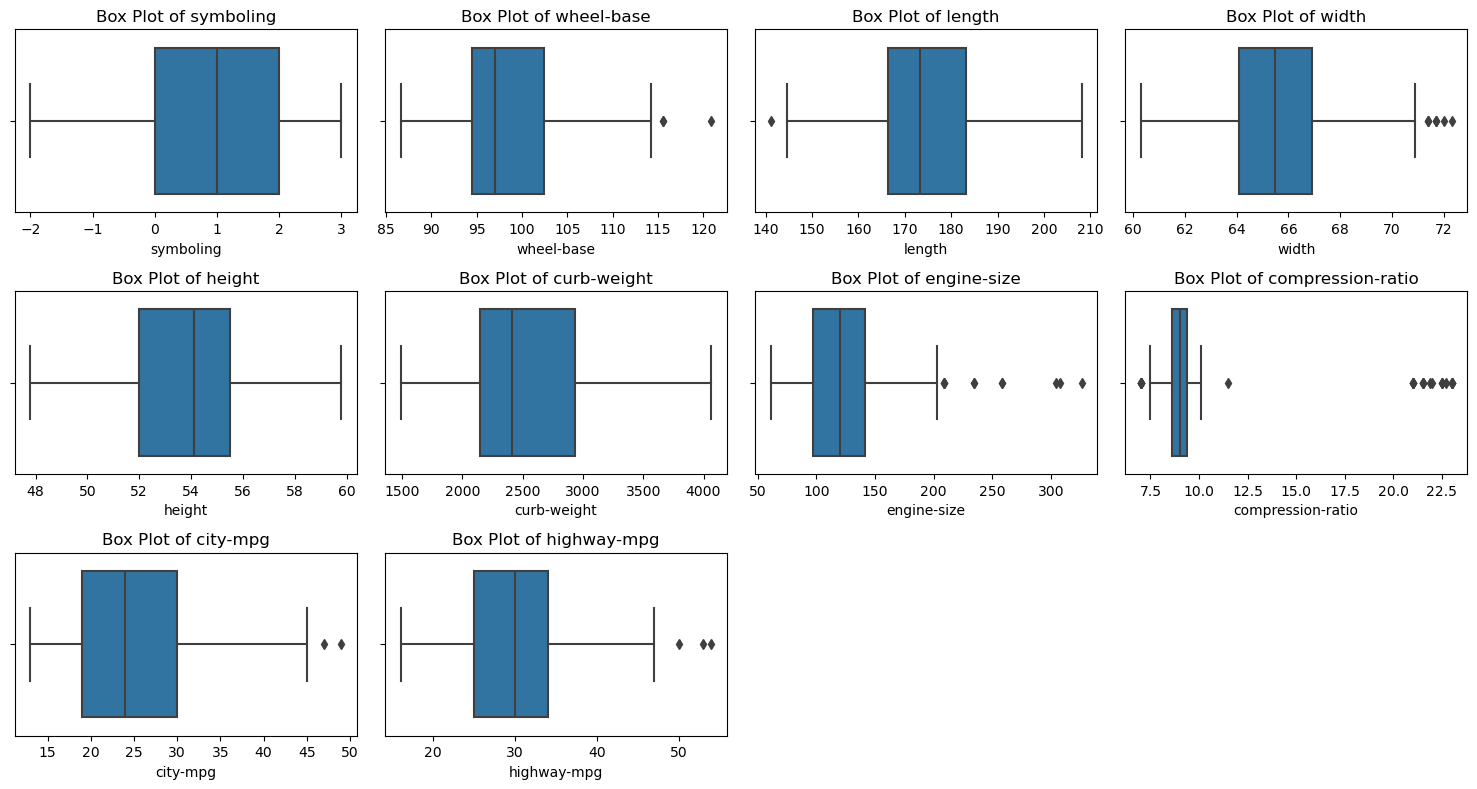

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

# Generate box plots for each numeric column
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


# Train Test Split

In [45]:
print(df.columns)


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [46]:
df['price']

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [47]:
# Ensure 'price' is in a numeric format to avoid exclusion in select_dtypes
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Select only numeric columns, ensuring 'price' is retained
df_numeric = df.select_dtypes(exclude='object')

# Separate features (X) and target variable (y)
X = df_numeric.drop('price', axis=1)
y = df_numeric['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting splits to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (164, 10)
X_test shape: (41, 10)
y_train shape: (164,)
y_test shape: (41,)


In [49]:
X_train

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
66,0,104.9,175.0,66.1,54.4,2700,134,22.0,31,39
111,0,107.9,186.7,68.4,56.7,3075,120,8.4,19,24
153,0,95.7,169.7,63.6,59.1,2280,92,9.0,31,37
96,1,94.5,165.3,63.8,54.5,1971,97,9.4,31,37
38,0,96.5,167.5,65.2,53.3,2289,110,9.0,27,33
...,...,...,...,...,...,...,...,...,...,...
106,1,99.2,178.5,67.9,49.7,3139,181,9.0,19,25
14,1,103.5,189.0,66.9,55.7,3055,164,9.0,20,25
92,1,94.5,165.3,63.8,54.5,1938,97,9.4,31,37
179,3,102.9,183.5,67.7,52.0,3016,171,9.3,19,24


In [51]:
y_train.fillna(y_train.mean(), inplace=True)


# Model Training

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
# Replace NaN in y_test with the mean of y_test
y_test.fillna(y_test.mean(), inplace=True)


In [55]:
# Replace NaN in y_pred with the mean of y_pred
y_pred = np.nan_to_num(y_pred, nan=y_pred.mean())


# Model Evaluation

In [56]:
# Testing Dataset
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 18804932.976911142
RMSE : 4336.465493568598
MAE : 2871.1439934626374
R Squared : 0.7588128691330018


In [58]:
# training Data Set
y_pred_train = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 12348777.481841091
RMSE : 3514.0827369088925
MAE : 2552.0462470168136
R Squared : 0.7852491701399766


# Testing on Single Row

In [60]:
column_names = X.columns
len(column_names)

10

In [61]:
column_names

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [63]:
X.head(1).T

,0
symboling,3.0
wheel-base,88.6
length,168.8
width,64.1
height,48.8
curb-weight,2548.0
engine-size,130.0
compression-ratio,9.0
city-mpg,21.0
highway-mpg,27.0


In [67]:
symboling = 2.0
wheel_base = 87
length = 177.9
width = 63
curb_weight = 2500
engine_size = 140.0
compression_ratio = 8.5
city_mpg = 22.0
highway_mpg = 29.0

# charges = ?

In [68]:
print(num_of_doors)

{'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}


In [69]:
import pickle

with open("Linear_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [73]:
with open('Linear_model.pkl', 'rb') as Linear_model_file:
    loaded_model = pickle.load(Linear_model_file)
    print("Model loaded from model.pkl")

Model loaded from model.pkl
